## Initialise

In [1]:
from wrappers.file_setup import CURRENT_EXPERIMENT
from wrappers.configreader import Config
from wrappers.file_setup import close_station, my_init
import qcodes as qc
from wrappers import *
from wrappers.transmon import *
%matplotlib nbagg

/Users/natalie/Documents/PhD/Qdev/Qcodes/qcodes/instrument/parameter.py:1315: UserWarning: Parameter single: `ManualParameter` is deprecated, use `Parameter` instead with `set_cmd=None`.
  '`Parameter` instead with `set_cmd=None`.'.format(self))


In [2]:
station = qc.Station()

In [3]:
my_init('floquet_test3', station, qubit_count=4, calib_config=True)

Activating auto-logging. Current session state plus future input saved.
Filename       : /Users/natalie/Documents/PhD/Qdev/QcodesRelated/QcodesExperiments/Qcodes_test_data/floquet_test3/commands.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


In [4]:
get_calibration_val('cycle_time')

1e-05

In [5]:
s = pb.make_floquet_dur_sequence(0, 2e-6, 100e-9, qubit_indices=[0, 1], floquet_freq=1e6, amp=1,
                                 channels=[1, 2, 3, 4, 5, 6], z_ramp_dur=100e-9,
                                form='cos', readout_SSBfreqs=[10e6], z_amps=[0.5, 2])

ch 1: [compensating_x_wait, wait, floquet_drive, wait, wait]
ch 2: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 3: [compensating_x_wait, wait, floquet_drive, wait, wait]
ch 4: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 5: [wait_before_measurement, cavity_measurement_i, wait_after_measurement]
ch 6: [wait_before_measurement, cavity_measurement_q, wait_after_measurement]
sequence check passed: 21 elements


<IPython.core.display.Javascript object>


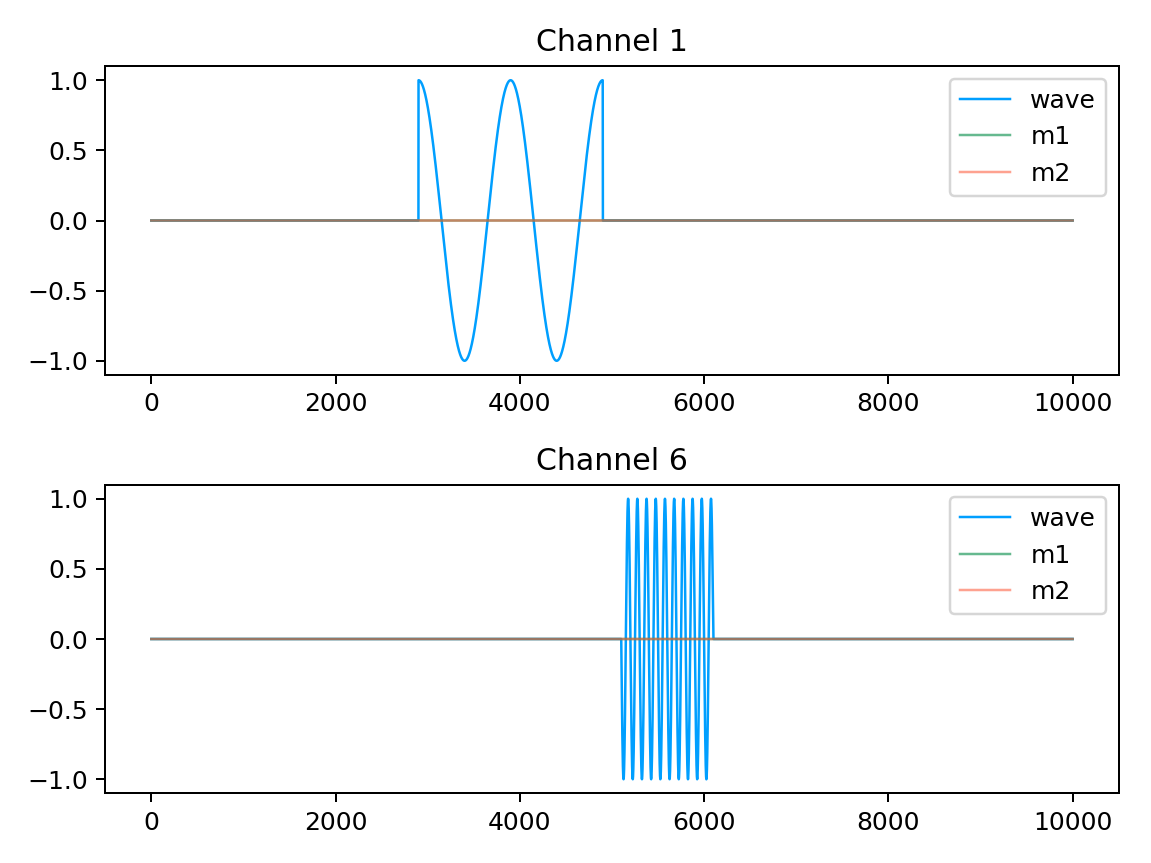

In [6]:
pl = s.plot(elemnum=20, channels=[1, 6])

In [7]:
s = pb.make_floquet_dur_seq_gated(0, 1e-6, 100e-9, qubit_indices=[0, 1, 2, 3], floquet_freq=10e6, amp=1,
                                z_ramp_dur=100e-9, qubit_SSBfreqs=[10e6, 20e6, 10e6, 20e6],
                                pi_half_before=[True, False, True, True],
                                form='cos', readout_SSBfreqs=[20e6, 30e6], z_amps=[0.5, 2, 1, 0.4],
                                 channels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], gaussian=True)

ch 1: [compensating_x_wait, X/2_I, wait, floquet_drive, wait, identity, wait]
ch 2: [compensating_y_wait, X/2_Q, wait, wait_for_floquet, wait, identity, wait]
ch 3: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 4: [compensating_x_wait, identity, wait, floquet_drive, wait, identity, wait]
ch 5: [compensating_y_wait, identity, wait, wait_for_floquet, wait, identity, wait]
ch 6: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 7: [compensating_x_wait, X/2_I, wait, floquet_drive, wait, identity, wait]
ch 8: [compensating_y_wait, X/2_Q, wait, wait_for_floquet, wait, identity, wait]
ch 9: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 10: [compensating_x_wait, X/2_I, wait, floquet_drive, wait, identity, wait]
ch 11: [compensating_y_wait, X/2_Q, wait, wait_for_floquet, wait, identity, wait]
ch 12: [compensating_z_wait, z_ramp_up, z_on, z_ramp_down, wait]
ch 13: [wait_before_measurement, cavity_measurement_i, wait_after_measurement]
ch 14: [wait_before_

<IPython.core.display.Javascript object>


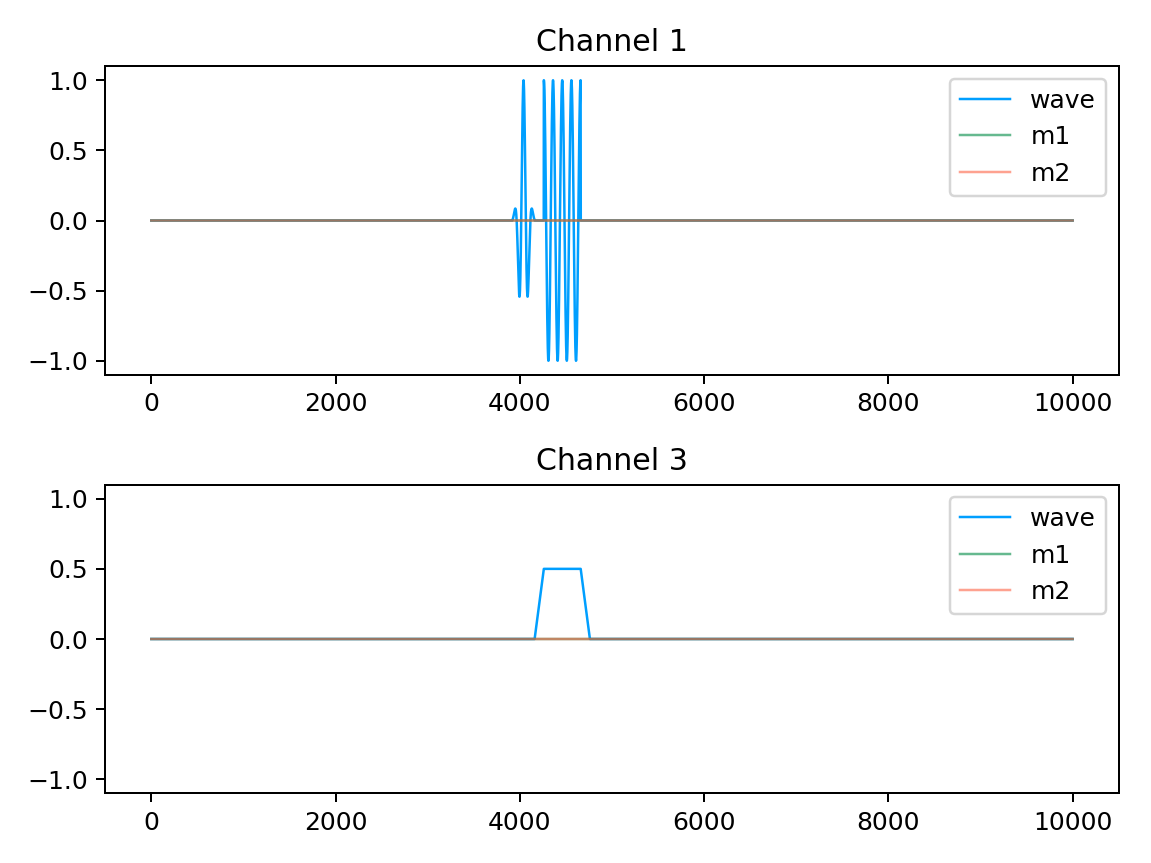

In [8]:
pl = s.plot(elemnum=4, channels=[1, 3])

In [9]:
get_calibration_array('pi_pulse_sigma')

[3e-08, 3e-08, 3e-08, 3e-08]